In [1]:
using Plots
using Random

include("../src/Simulation.jl")
using .Simulation

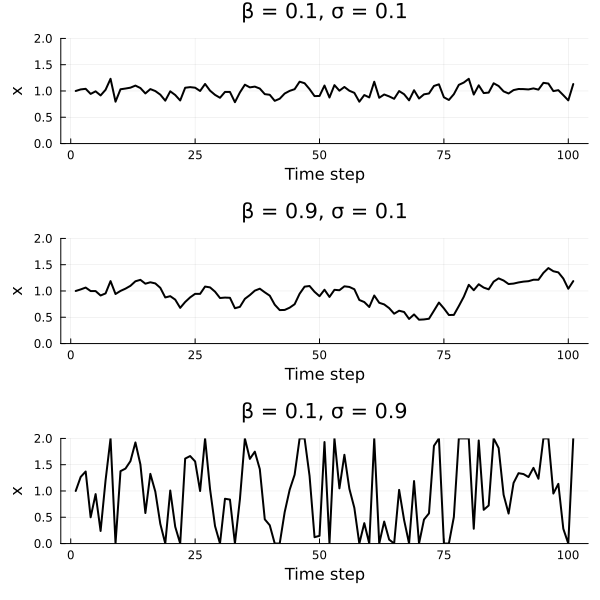

In [2]:
function plot_ar1(β::Float64, σ::Float64, T::Int = 100)::Plots.Plot
    return plot(
        Simulation.ar1(β, σ, 1.0, T, MersenneTwister(1)),
        ylim = (0, 2),
        label = false,
        linewidth = 2,
        color = "black",
        xlabel = "Time step",
        ylabel = "x",
        title = "β = $(β), σ = $(σ)"
    )
end

p = plot(
    plot_ar1(0.1, 0.1),
    plot_ar1(0.9, 0.1),
    plot_ar1(0.1, 0.9),
    layout = (3, 1),
    size = (600, 600),
)

savefig(p, "../img/HBESJ/AR1.png")
display(p)

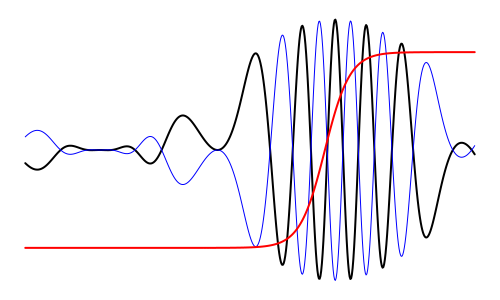

In [3]:
plot_style = Dict(
    :color => "black",
    :label => false,
    :linewidth => 2,
    :xticks => [],
    :yticks => [],
    :axis => false,
    :size => (500, 300)
)

# 振幅と波数の時間依存性を定義
amplitude(t) = 1 + sin(t)
wavenumber(t) = 1 + sin(t - π/2)

ts = 10:0.01:16
y = [amplitude(t) * sin(wavenumber(t) * t) for t in ts]

# Environmental Variability
p = plot(ts, y; plot_style...)

# Cooperation
plot_style[:color] = "blue"
plot_style[:linewidth] = 1
plot!(ts, -y; plot_style...)

# sigmoid function
a = 6  # 曲線の急激さを調整
b = 14  # 曲線の中心を調整
sigmoid(x) = 1 / (1 + exp(-a * (x - b)))

plot_style[:color] = "red"
plot_style[:linewidth] = 2
plot!(ts, (sigmoid.(ts) .- 0.5) .* 3; plot_style...)

savefig(p, "../img/HBESJ/VS.png")
display(p)